Approximate cost: 2313.606139126505
TSP tour: [(681, -139), (677, -87), (577, -75), (537, -108), (394, 46), (316, -123), (97, -99), (385, -169), (489, -198), (588, -211), (654, -144), (611, -106), (589, 53), (746, 96), (841, -66), (805, -120), (838, -203), (705, -159), (681, -139)]


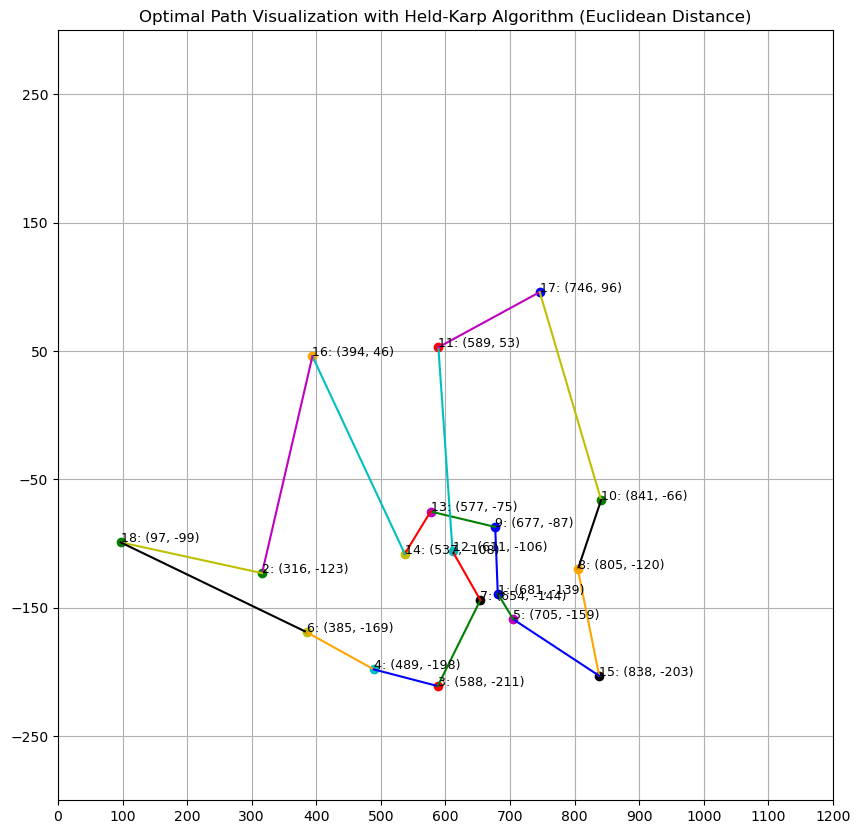

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from itertools import combinations
import pandas as pd
import math

# Load the Excel file
file_path = r'C:\Users\Gusul\Desktop\keypoints.xlsx'
data = pd.read_excel(file_path, usecols=[0, 3])  # Only load the first and fourth columns

# Create keypoint coordinates as tuples (column 1, column 4)
marked_points = list(zip(data.iloc[:, 0], data.iloc[:, 1]))

# Euclidean distance calculation function
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Construct the distance matrix
n = len(marked_points)
distance_matrix = [[euclidean_distance(marked_points[i], marked_points[j]) for j in range(n)] for i in range(n)]

def christofides_algorithm(distance_matrix):
    """
    Implementation of the Christofides algorithm to solve the TSP problem.
    
    :param dists: 2D numpy array containing distances between each pair of cities
    :return: Tuple containing the approximate cost and the tour as a list of cities
    """
    # Step 1: Create a complete graph
    G = nx.Graph()
    n = len(distance_matrix)
    for i in range(n):
        for j in range(i+1, n):
            G.add_edge(i, j, weight = distance_matrix[i][j])

    # Step 2: Find a minimum spanning tree (MST)
    MST = nx.minimum_spanning_tree(G)

    # Step 3: Find the odd degree vertices in the MST
    odd_degree_vertices = [v for v in MST.nodes() if MST.degree(v) % 2 == 1]

    # Step 4: Find a minimum weight perfect matching on the odd degree vertices
    subgraph = G.subgraph(odd_degree_vertices)
    matching = nx.algorithms.matching.min_weight_matching(subgraph)

    # Step 5: Combine the edges of the MST and the matching to create an Eulerian multigraph
    combined_graph = nx.MultiGraph(MST)
    combined_graph.add_edges_from(matching)

    # Step 6: Find an Eulerian circuit in the multigraph
    eulerian_circuit = list(nx.eulerian_circuit(combined_graph))

    # Step 7: Convert the Eulerian circuit to a Hamiltonian circuit (TSP tour) by skipping repeated vertices
    visited = set()
    tsp_tour = []
    cost = 0
    for u, v in eulerian_circuit:
        if u not in visited:
            tsp_tour.append(u)
            visited.add(u)
            if len(tsp_tour) > 1:
                cost += distance_matrix[tsp_tour[-2]][tsp_tour[-1]]
    tsp_tour.append(tsp_tour[0])  # Return to the starting point
    cost += distance_matrix[tsp_tour[-2]][tsp_tour[-1]]

    return cost, tsp_tour


# Solve the TSP using the Christofides algorithm
approx_cost, tsp_tour = christofides_algorithm(distance_matrix)
tsp_tour = [marked_points[p] for p in tsp_tour]

print(f"Approximate cost: {approx_cost}")
print(f"TSP tour: {tsp_tour}")

# Visualization
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Set x-axis and y-axis limits
plt.xlim(0, 900)  # x-axis from 0 to 900
plt.ylim(-300, 300)  # y-axis from -300 to 300

# Define custom ticks for the grid lines
plt.xticks(range(0, 1201, 100))  # x-axis grid lines every 100 units
plt.yticks(range(-250, 251, 100))  # y-axis grid lines every 100 units

plt.grid(True)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# Plot the marked points with labels
for i, point in enumerate(marked_points):
    plt.plot(point[0], point[1], 'o', color=colors[i % len(colors)])
    plt.text(point[0] + 0.1, point[1] + 0.1, f'{i+1}: ({point[0]}, {point[1]})', fontsize=9)

# Plot the optimal path
for i in range(len(tsp_tour) - 1):
    plt.plot([tsp_tour[i][0], tsp_tour[i+1][0]], [tsp_tour[i][1], tsp_tour[i+1][1]], '-', color=colors[i % len(colors)])

plt.title('Optimal Path Visualization with Held-Karp Algorithm (Euclidean Distance)')
plt.show()


Approximate cost: 2676.672735558368
TSP tour: [(682, -108), (649, -89), (600, -111), (580, -130), (549, -79), (269, -21), (174, 91), (80, -109), (233, -88), (716, 94), (744, 21), (1142, 12), (966, -111), (990, -146), (897, -59), (833, -71), (675, -29), (665, -70), (682, -108)]


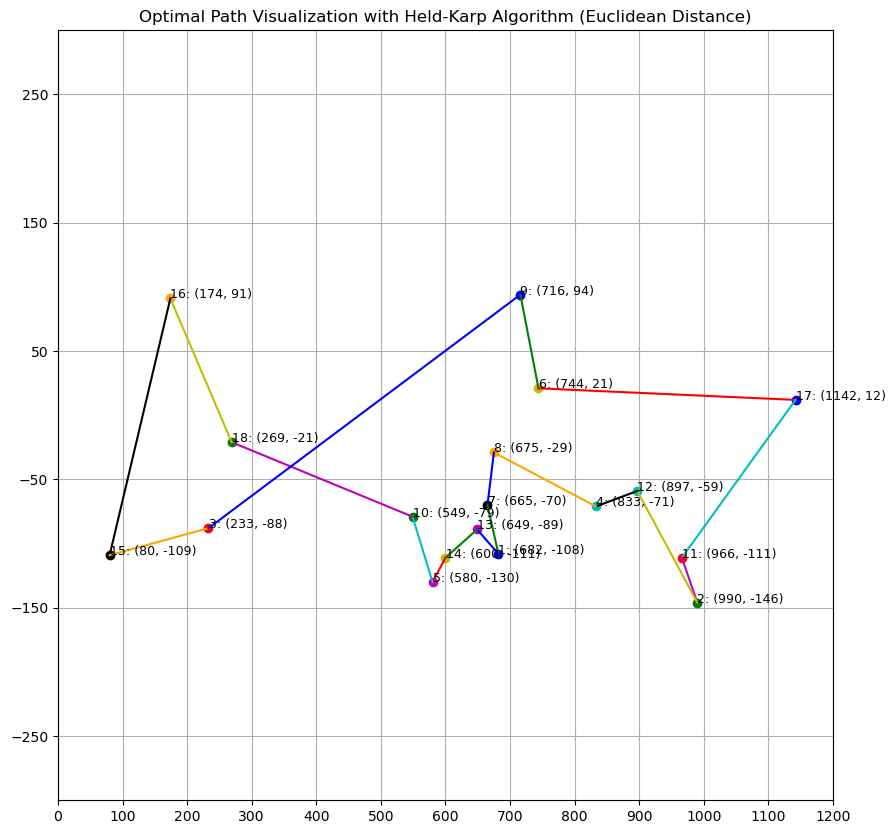

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from itertools import combinations
import pandas as pd
import math

# Load the Excel file
file_path = r'C:\Users\Gusul\Desktop\keypoints_2.xlsx'
data = pd.read_excel(file_path, usecols=[0, 3])  # Only load the first and fourth columns

# Create keypoint coordinates as tuples (column 1, column 4)
marked_points = list(zip(data.iloc[:, 0], data.iloc[:, 1]))

# Euclidean distance calculation function
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Construct the distance matrix
n = len(marked_points)
distance_matrix = [[euclidean_distance(marked_points[i], marked_points[j]) for j in range(n)] for i in range(n)]

def christofides_algorithm(distance_matrix):
    """
    Implementation of the Christofides algorithm to solve the TSP problem.
    
    :param dists: 2D numpy array containing distances between each pair of cities
    :return: Tuple containing the approximate cost and the tour as a list of cities
    """
    # Step 1: Create a complete graph
    G = nx.Graph()
    n = len(distance_matrix)
    for i in range(n):
        for j in range(i+1, n):
            G.add_edge(i, j, weight = distance_matrix[i][j])

    # Step 2: Find a minimum spanning tree (MST)
    MST = nx.minimum_spanning_tree(G)

    # Step 3: Find the odd degree vertices in the MST
    odd_degree_vertices = [v for v in MST.nodes() if MST.degree(v) % 2 == 1]

    # Step 4: Find a minimum weight perfect matching on the odd degree vertices
    subgraph = G.subgraph(odd_degree_vertices)
    matching = nx.algorithms.matching.min_weight_matching(subgraph)

    # Step 5: Combine the edges of the MST and the matching to create an Eulerian multigraph
    combined_graph = nx.MultiGraph(MST)
    combined_graph.add_edges_from(matching)

    # Step 6: Find an Eulerian circuit in the multigraph
    eulerian_circuit = list(nx.eulerian_circuit(combined_graph))

    # Step 7: Convert the Eulerian circuit to a Hamiltonian circuit (TSP tour) by skipping repeated vertices
    visited = set()
    tsp_tour = []
    cost = 0
    for u, v in eulerian_circuit:
        if u not in visited:
            tsp_tour.append(u)
            visited.add(u)
            if len(tsp_tour) > 1:
                cost += distance_matrix[tsp_tour[-2]][tsp_tour[-1]]
    tsp_tour.append(tsp_tour[0])  # Return to the starting point
    cost += distance_matrix[tsp_tour[-2]][tsp_tour[-1]]

    return cost, tsp_tour


# Solve the TSP using the Christofides algorithm
approx_cost, tsp_tour = christofides_algorithm(distance_matrix)
tsp_tour = [marked_points[p] for p in tsp_tour]

print(f"Approximate cost: {approx_cost}")
print(f"TSP tour: {tsp_tour}")

# Visualization
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Set x-axis and y-axis limits
plt.xlim(0, 900)  # x-axis from 0 to 900
plt.ylim(-300, 300)  # y-axis from -300 to 300

# Define custom ticks for the grid lines
plt.xticks(range(0, 1201, 100))  # x-axis grid lines every 100 units
plt.yticks(range(-250, 251, 100))  # y-axis grid lines every 100 units

plt.grid(True)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# Plot the marked points with labels
for i, point in enumerate(marked_points):
    plt.plot(point[0], point[1], 'o', color=colors[i % len(colors)])
    plt.text(point[0] + 0.1, point[1] + 0.1, f'{i+1}: ({point[0]}, {point[1]})', fontsize=9)

# Plot the optimal path
for i in range(len(tsp_tour) - 1):
    plt.plot([tsp_tour[i][0], tsp_tour[i+1][0]], [tsp_tour[i][1], tsp_tour[i+1][1]], '-', color=colors[i % len(colors)])

plt.title('Optimal Path Visualization with Held-Karp Algorithm (Euclidean Distance)')
plt.show()


Approximate cost: 2117.9461389016506
TSP tour: [(723, -33), (804, -98), (819, -141), (846, -43), (906, -97), (955, 86), (682, 71), (694, -19), (657, -53), (513, -67), (458, -43), (399, -124), (213, -60), (280, -102), (307, -72), (407, -217), (675, -78), (727, -25), (723, -33)]


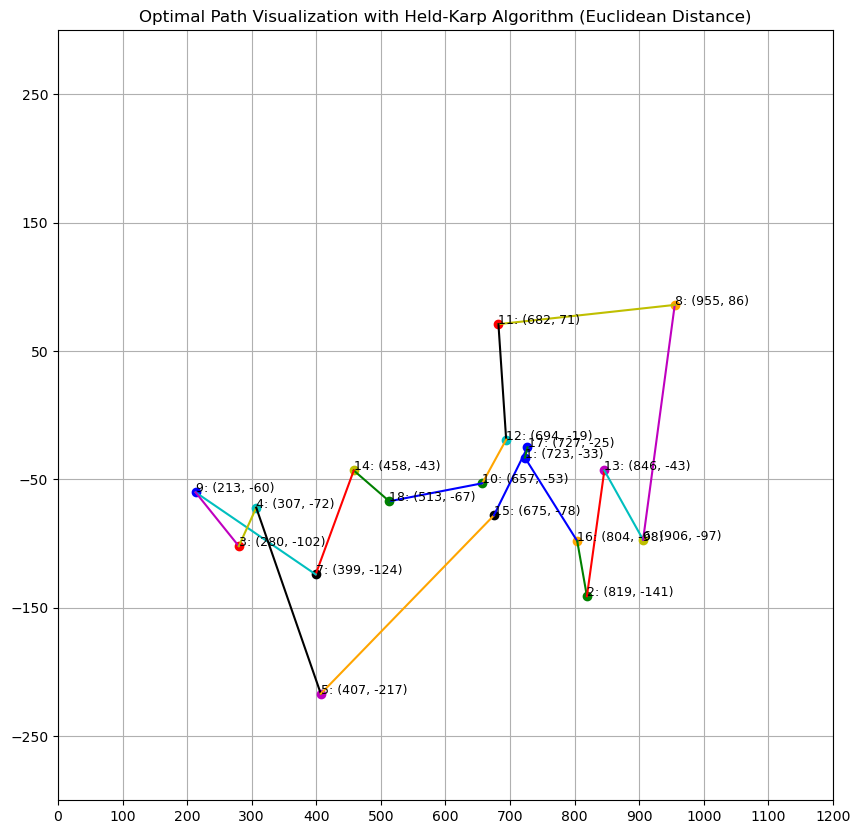

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from itertools import combinations
import pandas as pd
import math

# Load the Excel file
file_path = r'C:\Users\Gusul\Desktop\keypoints_3.xlsx'
data = pd.read_excel(file_path, usecols=[0, 3])  # Only load the first and fourth columns

# Create keypoint coordinates as tuples (column 1, column 4)
marked_points = list(zip(data.iloc[:, 0], data.iloc[:, 1]))

# Euclidean distance calculation function
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Construct the distance matrix
n = len(marked_points)
distance_matrix = [[euclidean_distance(marked_points[i], marked_points[j]) for j in range(n)] for i in range(n)]

def christofides_algorithm(distance_matrix):
    """
    Implementation of the Christofides algorithm to solve the TSP problem.
    
    :param dists: 2D numpy array containing distances between each pair of cities
    :return: Tuple containing the approximate cost and the tour as a list of cities
    """
    # Step 1: Create a complete graph
    G = nx.Graph()
    n = len(distance_matrix)
    for i in range(n):
        for j in range(i+1, n):
            G.add_edge(i, j, weight = distance_matrix[i][j])

    # Step 2: Find a minimum spanning tree (MST)
    MST = nx.minimum_spanning_tree(G)

    # Step 3: Find the odd degree vertices in the MST
    odd_degree_vertices = [v for v in MST.nodes() if MST.degree(v) % 2 == 1]

    # Step 4: Find a minimum weight perfect matching on the odd degree vertices
    subgraph = G.subgraph(odd_degree_vertices)
    matching = nx.algorithms.matching.min_weight_matching(subgraph)

    # Step 5: Combine the edges of the MST and the matching to create an Eulerian multigraph
    combined_graph = nx.MultiGraph(MST)
    combined_graph.add_edges_from(matching)

    # Step 6: Find an Eulerian circuit in the multigraph
    eulerian_circuit = list(nx.eulerian_circuit(combined_graph))

    # Step 7: Convert the Eulerian circuit to a Hamiltonian circuit (TSP tour) by skipping repeated vertices
    visited = set()
    tsp_tour = []
    cost = 0
    for u, v in eulerian_circuit:
        if u not in visited:
            tsp_tour.append(u)
            visited.add(u)
            if len(tsp_tour) > 1:
                cost += distance_matrix[tsp_tour[-2]][tsp_tour[-1]]
    tsp_tour.append(tsp_tour[0])  # Return to the starting point
    cost += distance_matrix[tsp_tour[-2]][tsp_tour[-1]]

    return cost, tsp_tour


# Solve the TSP using the Christofides algorithm
approx_cost, tsp_tour = christofides_algorithm(distance_matrix)
tsp_tour = [marked_points[p] for p in tsp_tour]

print(f"Approximate cost: {approx_cost}")
print(f"TSP tour: {tsp_tour}")

# Visualization
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Set x-axis and y-axis limits
plt.xlim(0, 900)  # x-axis from 0 to 900
plt.ylim(-300, 300)  # y-axis from -300 to 300

# Define custom ticks for the grid lines
plt.xticks(range(0, 1201, 100))  # x-axis grid lines every 100 units
plt.yticks(range(-250, 251, 100))  # y-axis grid lines every 100 units

plt.grid(True)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# Plot the marked points with labels
for i, point in enumerate(marked_points):
    plt.plot(point[0], point[1], 'o', color=colors[i % len(colors)])
    plt.text(point[0] + 0.1, point[1] + 0.1, f'{i+1}: ({point[0]}, {point[1]})', fontsize=9)

# Plot the optimal path
for i in range(len(tsp_tour) - 1):
    plt.plot([tsp_tour[i][0], tsp_tour[i+1][0]], [tsp_tour[i][1], tsp_tour[i+1][1]], '-', color=colors[i % len(colors)])

plt.title('Optimal Path Visualization with Held-Karp Algorithm (Euclidean Distance)')
plt.show()
